# Import Functions

In [137]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.weightstats import ttest_ind

from pylab import rcParams
import seaborn as sb

import scipy
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import chi2_contingency

import sklearn
from sklearn.preprocessing import scale
from collections import Counter

In [138]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')

# Read in and graph data

In [139]:
address = '/Users/drewsheets/Desktop/l2c_results/prelim_analysis_type.csv'
version = pd.read_csv(address)
version.columns = ['user', 'version', 'avg_error']
version.head()

,user,version,avg_error
0,481,0,0.402118
1,483,0,0.343128
2,484,1,0.406943
3,485,1,0.456995
4,486,0,0.409336


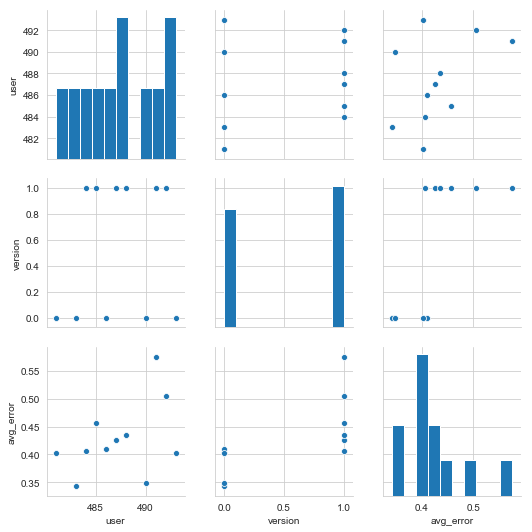

In [140]:
sb.pairplot(version)

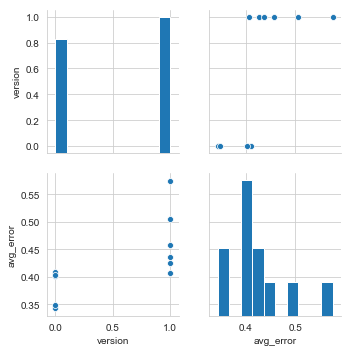

In [141]:
x = version[['version', 'avg_error']]
sb.pairplot(x)

In [142]:
address2 = '/Users/drewsheets/Desktop/l2c_results/prelim_analysis_estimates.csv'
estimates = pd.read_csv(address2)
estimates.columns = ['estimate_id', 'user_id', 'image_id',
                    'estimate_calories', 'perc_error', 'response_time',
                    'food_type', 'abs_value_error']
estimates.head()

,estimate_id,user_id,image_id,estimate_calories,perc_error,response_time,food_type,abs_value_error
0,6612,493,1,350,-0.250535,7,9,0.250535
1,6613,493,1001,120,-0.552239,4,3,0.552239
2,6614,493,4,240,1.474230,9,9,1.474230
3,6615,493,10,257,-0.261494,4,5,0.261494
4,6616,493,12,340,-0.365672,8,10,0.365672


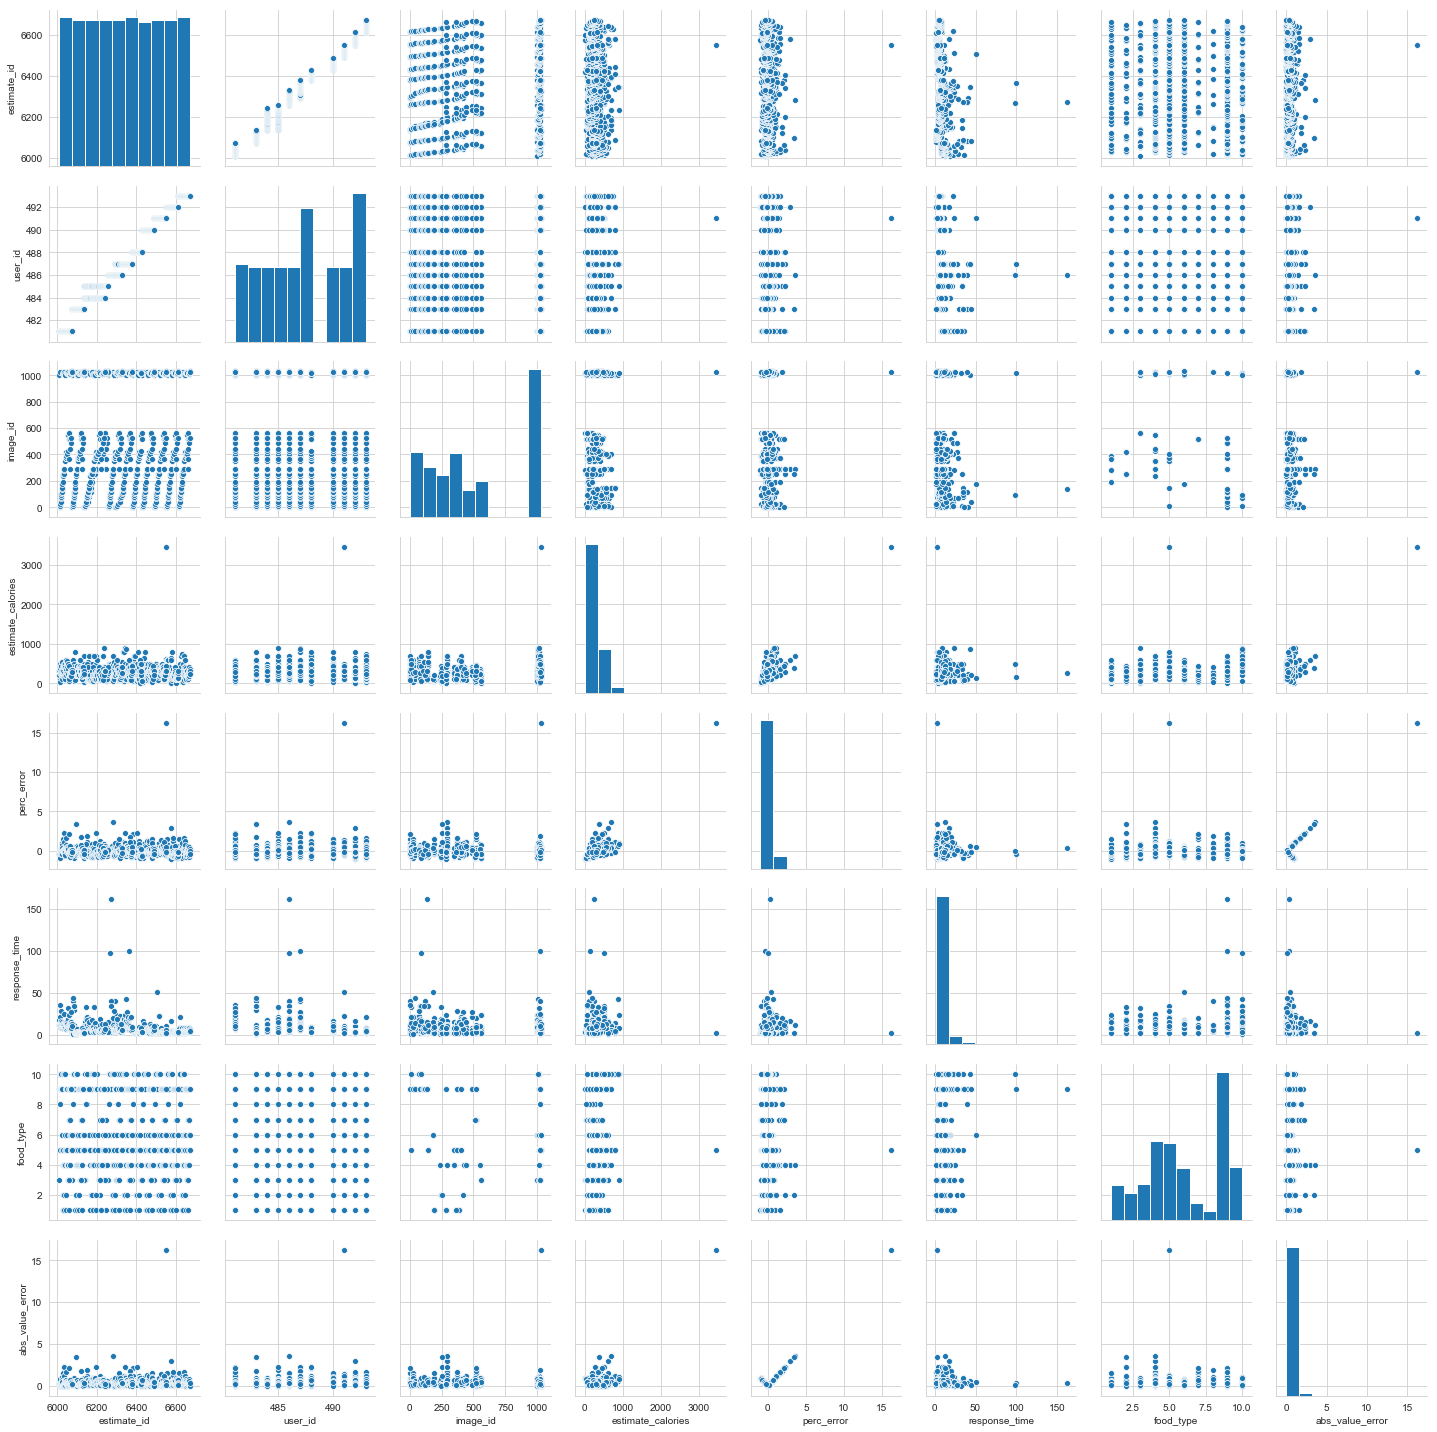

In [143]:
sb.pairplot(estimates)

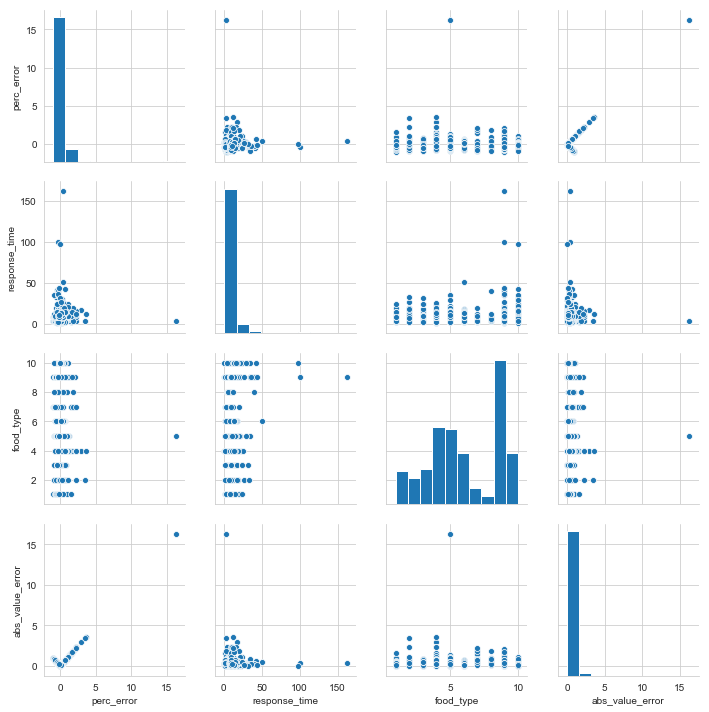

In [144]:
y = estimates[['perc_error', 'response_time',
               'food_type', 'abs_value_error']]
sb.pairplot(y)

# Interesting Variables

In [145]:
error = y['perc_error']
abs_error = y['abs_value_error']
time = y['response_time']
category = y['food_type']
version = x['version']
avg_error = x['avg_error']

# Basic Stats (count, mean, std, variable distribution)

In [146]:
x.describe()

,version,avg_error
count,11.000000,11.000000
mean,0.545455,0.428217
std,0.522233,0.066433
min,0.000000,0.343128
25%,0.000000,0.402563
50%,1.000000,0.409336
75%,1.000000,0.446324
max,1.000000,0.575201


In [147]:
estimates.describe()

,estimate_id,user_id,image_id,estimate_calories,perc_error,response_time,food_type,abs_value_error
count,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000
mean,6340.868580,487.231118,523.036254,285.702417,0.036048,8.388218,6.128399,0.428037
std,191.650809,3.769782,381.745646,201.743049,0.855414,10.192788,2.821488,0.741311
min,6010.000000,481.000000,1.000000,10.000000,-0.975962,1.000000,1.000000,0.000000
25%,6175.250000,484.000000,192.000000,180.000000,-0.353086,4.000000,4.000000,0.142857
50%,6340.500000,487.000000,406.000000,250.000000,-0.077809,6.000000,6.000000,0.302034
75%,6506.750000,491.000000,1011.000000,358.500000,0.237113,9.000000,9.000000,0.547312
max,6672.000000,493.000000,1029.000000,3450.000000,16.250000,162.000000,10.000000,16.250000


# Pearson Rank Correlation Coefficient

In [129]:
pearsonr_coefficient, p_value= pearsonr(version, avg_error)
result = '%.4g'%(pearsonr_coefficient)
print('Pearson Rank Correlation Coefficient ' + str((result)))

Pearson Rank Correlation Coefficient 0.6789


In [130]:
pearsonr_coefficient, p_value= pearsonr(time, abs_error)
result = '%.4g'%(pearsonr_coefficient)
print('Pearson Rank Correlation Coefficient ' + str((result)))

Pearson Rank Correlation Coefficient -0.01899


In [131]:
pearsonr_coefficient, p_value= pearsonr(category, abs_error)
result = '%.4g'%(pearsonr_coefficient)
print('Pearson Rank Correlation Coefficient ' + str((result)))

Pearson Rank Correlation Coefficient -0.05206


# Chi-Square Statistic & P-Value

In [106]:
table = pd.crosstab(version, avg_error)
chi2, p, dof, expected = chi2_contingency(table.values)
chi_val = '%.4g'%(chi2)
p_val = '%.4g'%(p)
print ('Chi-square Statistic: ' + chi_val + '     p-value: ' + p_val)

Chi-square Statistic: 11     p-value: 0.3575


In [107]:
table = pd.crosstab(time, abs_error)
chi2, p, dof, expected = chi2_contingency(table.values)
chi_val = '%.4g'%(chi2)
p_val = '%.4g'%(p)
print ('Chi-square Statistic: ' + chi_val + '     p-value: ' + p_val)

Chi-square Statistic: 1.527e+04     p-value: 1.323e-08


In [108]:
table = pd.crosstab(category, abs_error)
chi2, p, dof, expected = chi2_contingency(table.values)
chi_val = '%.4g'%(chi2)
p_val = '%.4g'%(p)
print ('Chi-square Statistic: ' + chi_val + '     p-value: ' + p_val)

Chi-square Statistic: 4698     p-value: 1.446e-52


# T Test (T-value, p-value, Degrees of Freedom)

In [132]:
ttest = ttest_ind(version, avg_error)
t_val = '%.4g'%(ttest[0])
p_val = '%.4g'%(ttest[1])
dof = '%.4g'%(ttest[2])
print('T-value: ' + str(t_val) + '     p-value: ' + str(p_val) + '     Degrees of Freedom: ' + str(dof))

T-value: 0.7386     p-value: 0.4687     Degrees of Freedom: 20


In [133]:
ttest = ttest_ind(time, abs_error)
t_val = '%.4g'%(ttest[0])
p_val = '%.4g'%(ttest[1])
dof = '%.4g'%(ttest[2])
print('T-value: ' + str(t_val) + '     p-value: ' + str(p_val) + '     Degrees of Freedom: ' + str(dof))

T-value: 20.04     p-value: 3.169e-78     Degrees of Freedom: 1322


In [134]:
ttest = ttest_ind(category, abs_error)
t_val = '%.4g'%(ttest[0])
p_val = '%.4g'%(ttest[1])
dof = '%.4g'%(ttest[2])
print('T-value: ' + str(t_val) + '     p-value: ' + str(p_val) + '     Degrees of Freedom: ' + str(dof))

T-value: 50.28     p-value: 4.012e-309     Degrees of Freedom: 1322


# One-Way ANOVA (F-statistic, p-value)

In [125]:
anova = stats.f_oneway(abs_error, time, category)
f_stat = '%.4g'%(anova[0])
p_val = '%.4g'%(anova[1])
print('F-statistic: ' + str(f_stat) + '     p-value: ' + str(p_val))

F-statistic: 297.3     p-value: 1.173e-113


In [126]:
anova = stats.f_oneway(error, time, category)
f_stat = '%.4g'%(anova[0])
p_val = '%.4g'%(anova[1])
print('F-statistic: ' + str(f_stat) + '     p-value: ' + str(p_val))

F-statistic: 329.2     p-value: 3.453e-124


In [122]:
anova = stats.f_oneway(abs_error, category)
f_stat = '%.4g'%(anova[0])
p_val = '%.4g'%(anova[1])
print('F-statistic: ' + str(f_stat) + '     p-value: ' + str(p_val))

F-statistic: 2528     p-value: 4.012e-309


In [123]:
anova = stats.f_oneway(abs_error, time)
f_stat = '%.4g'%(anova[0])
p_val = '%.4g'%(anova[1])
print('F-statistic: ' + str(f_stat) + '     p-value: ' + str(p_val))

F-statistic: 401.6     p-value: 3.169e-78


In [128]:
anova = stats.f_oneway(avg_error, version)
f_stat = '%.4g'%(anova[0])
p_val = '%.4g'%(anova[1])
print('F-statistic: ' + str(f_stat) + '     p-value: ' + str(p_val))

F-statistic: 0.5455     p-value: 0.4687
